<a href="https://colab.research.google.com/github/haripriya678/tableau_dashboard/blob/main/Stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


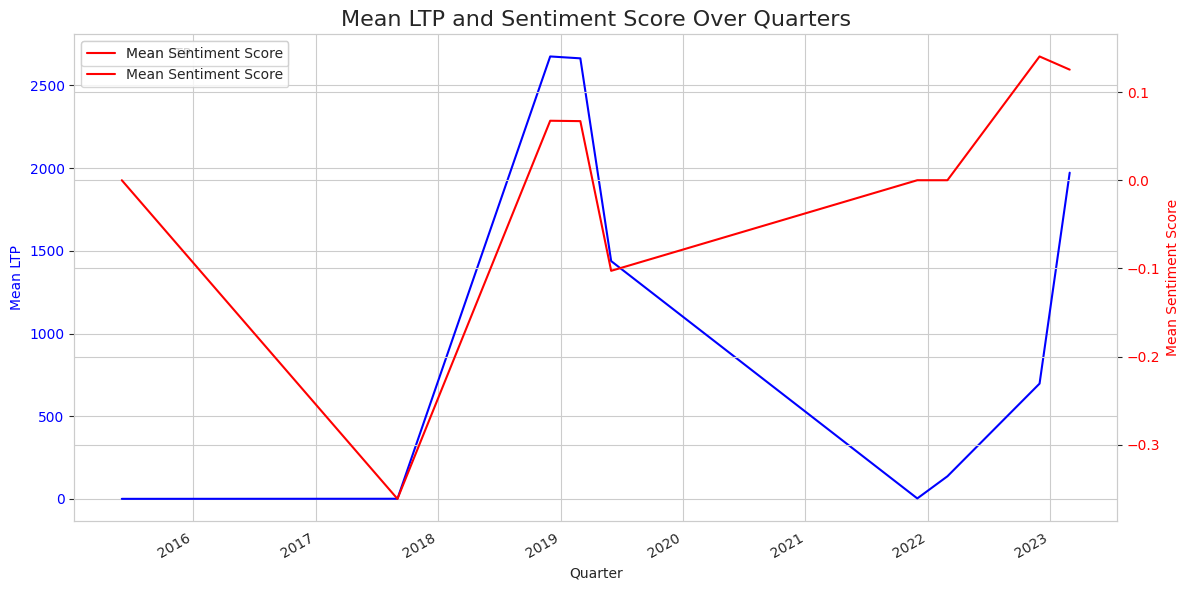

In [1]:
import pandas as pd
import random
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_excel('/content/final.xlsx')

# 2. Generate Synthetic Text Data for Sentiment Analysis
def generate_headline(company_name):
    positive_templates = [
        f"{company_name} Soars on Strong Earnings Report",
        f"Analyst Upgrades {company_name} Amid Market Optimism",
        f"{company_name} Announces Innovative New Product, Stock Jumps",
        f"Strategic Partnership Boosts {company_name} Shares",
        f"Positive Outlook for {company_name} Following Q1 Results"
    ]
    negative_templates = [
        f"{company_name} Stock Falls on Disappointing Revenue",
        f"Regulatory Scrutiny Hits {company_name} Hard",
        f"Profit Warning Sends {company_name} Shares Tumbling",
        f"Supply Chain Issues Plague {company_name}'s Production",
        f"Market Concerns Over {company_name}'s Debt Levels"
    ]
    neutral_templates = [
        f"{company_name} Holds Steady Amidst Market Fluctuations",
        f"New Leadership Appointed at {company_name}",
        f"{company_name} Explores Expansion into New Regions",
        f"Industry Trends Impacting {company_name}'s Future Strategy",
        f"{company_name} Releases Annual Shareholder Report"
    ]
    all_templates = positive_templates + negative_templates + neutral_templates
    return random.choice(all_templates)

df['News_Headline'] = df['peers_Name'].apply(generate_headline)

# 3. Perform Sentiment Analysis
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

def get_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_score'] = df['News_Headline'].apply(get_sentiment_score)
df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)

# 4. Aggregate Sentiment and Stock Data
df_aggregated = df.groupby('Results_QuarterName').agg({
    'LTP': 'mean',
    'sentiment_score': 'mean'
}).reset_index()

# 5. Correlate and Visualize Sentiment with Stock Performance
sns.set_style("whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x='Results_QuarterName', y='LTP', data=df_aggregated, ax=ax1, color='blue', label='Mean LTP')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Mean LTP', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

sns.lineplot(x='Results_QuarterName', y='sentiment_score', data=df_aggregated, ax=ax2, color='red', label='Mean Sentiment Score')
ax2.set_ylabel('Mean Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Mean LTP and Sentiment Score Over Quarters', fontsize=16)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()